## Hands On 1

### Topics
_Working With Signal_

### Personal Identity
|Nama Mahasiswa | Nomor Induk Mahasiswa |
| --- | --- |
| Kevin Simorangkir | 121140150 |

### Instructions
1. **Membuat Gelombang Sinus dan Cosinus**:
   - Buat array `t` yang berkisar dari 0 hingga 2 dengan langkah sebesar 0.0001.
   - Buat sinyal-sinyal berikut menggunakan array waktu ini:
     1. $y1 = 2 \cdot \sin(2 \pi \cdot 3 \cdot t + 0)$
     2. $y2 = 1 \cdot \cos(2 \pi \cdot 4 \cdot t + \pi/4)$
     3. $y3 = -1 \cdot \sin(2 \pi \cdot 5 \cdot t + \pi/2)$
     4. $y4 = 0.5 \cdot \cos(2 \pi \cdot 6 \cdot t + \pi)$

2. **Perbandingan Subplot**:
   - Buat gambar dengan 4 subplot (grid 2x2) untuk membandingkan semua sinyal secara berdampingan.
   - Setiap subplot harus berisi salah satu sinyal \( y1 \), \( y2 \), \( y3 \), dan \( y4 \).

3. **Pertanyaan Analisis**:
   - Jawab pertanyaan berikut dalam sel markdown di Jupyter Notebook Anda:
     1. Berapa amplitudo dan frekuensi masing-masing sinyal?
     2. Bagaimana pergeseran fase mempengaruhi posisi gelombang? (Anda dapat mengubah nilai fase pada sinyal-sinyal yang telah dibuat sesuka anda)
     3. Bandingkan sinyal-sinyal dengan amplitudo yang berbeda dan diskusikan bagaimana amplitudo mempengaruhi tampilan gelombang.
     4. Bandingkan sinyal-sinyal dengan pergeseran fase yang berbeda dan diskusikan bagaimana pergeseran fase mempengaruhi tampilan gelombang.

4. **Tugas Lanjutan**:
   - Buat sinyal baru $y5$ yang merupakan kombinasi dari $y1$ dan $y2$ yaitu, $y5 = y1 + y2$.
   - Plot $y5$ dan diskusikan bagaimana kombinasi dua gelombang sinus/cosinus mempengaruhi bentuk gelombang yang dihasilkan.

5. Buktikanlah bahwa proses downsampling (resampling dengan laju sampling yang lebih rendah) dapat menghilangkan informasi dari sinyal asli. Untuk melakukan hal ini, gunakan sinyal ECG sintetis (dengan method nk.ecg_simulate) sesuai spesifikasi berikut:

   - Durasi: Berdasarkan 3 digit terakhir nim anda
   - Sampling Rate: 150 Hz
   - Noise Level: 0.<2 digit nim terakhir>
   - Heart Rate: 80 BPM 
   - Random State: tanggal bulan tahun lahir anda dengan format YYMMDD misalnya 240925

Lakukan downsampling dari 150Hz ke 100Hz, 50Hz, 25Hz, 10Hz, hingga 5Hz. Jelaskan apa yang terjadi dan buktikan bahwa semakin rendah sampling frequency (fs) maka sinyal akan semakin terdistorsi dan terdapat Aliasing pada sinyal hasil downsampling. Jelaskan apa itu Aliasing

6. Terdapat parameter order pada saat melakukan filtering. Apa yang dimaksud dengan order? Apa yang terjadi ketika mengubah nilai order? Lakukan experimen secara mandiri

7. Lakukan eksperimen dengan merancang filter band-pass menggunakan signal.butter. Pada sinyal respirasi (pernapasan). Anda dapat dengan bebas menentukan sinyal asli, noise, dan frekuensi cutoff yang diinginkan. Jelaskan latar belakang penentuan frekuensi cutoff

---

### What's The Problem ?
1. **Membuat Gelombang Sinus dan Cosinus**:
   - Buat array `t` yang berkisar dari 0 hingga 2 dengan langkah sebesar 0.0001.
   - Buat sinyal-sinyal berikut menggunakan array waktu ini:
     1. $y1 = 2 \cdot \sin(2 \pi \cdot 3 \cdot t + 0)$
     2. $y2 = 1 \cdot \cos(2 \pi \cdot 4 \cdot t + \pi/4)$
     3. $y3 = -1 \cdot \sin(2 \pi \cdot 5 \cdot t + \pi/2)$
     4. $y4 = 0.5 \cdot \cos(2 \pi \cdot 6 \cdot t + \pi)$

### Tahap Persiapan
1. Siapkan Library / pustaka yang menjadi alat dalam pengerjaan Hands On 1 ini. Dalam hal ini menggunakan 2 (dua) pustaka yaitu `Numpy` dan `Matplotlib.pyplot`.

In [13]:
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for plotting

2. Deklarasikan untuk sumbu waktu / sumbu x nya dalam `array`

In [14]:
sumbu_waktu = np.arange(0, 10, 0.0001) # sumbu waktu dari 0 sampai 10 detik dengan step 0.0001 detik

3. Definisikan sinyal dari `y1` , `y2` , `y3`, dan `y4` .

In [15]:
y1 = 2 * np.sin(2 * np.pi * 3 * sumbu_waktu + 0) # sinyal pertama
y2 = 1 * np.cos(2 * np.pi * 4 * sumbu_waktu + np.pi/4) # sinyal kedua
y3 = -1 * np.sin(2 * np.pi * 5 * sumbu_waktu + np.pi/2) # sinyal ketiga
y4 = 0.5 * np.cos(2 * np.pi * 6 * sumbu_waktu + np.pi) # sinyal keempat

4. Visualisasikan hasil dari sinyal yang telah didefinisikan sebelumnya menjadi sebuah visual gambar.

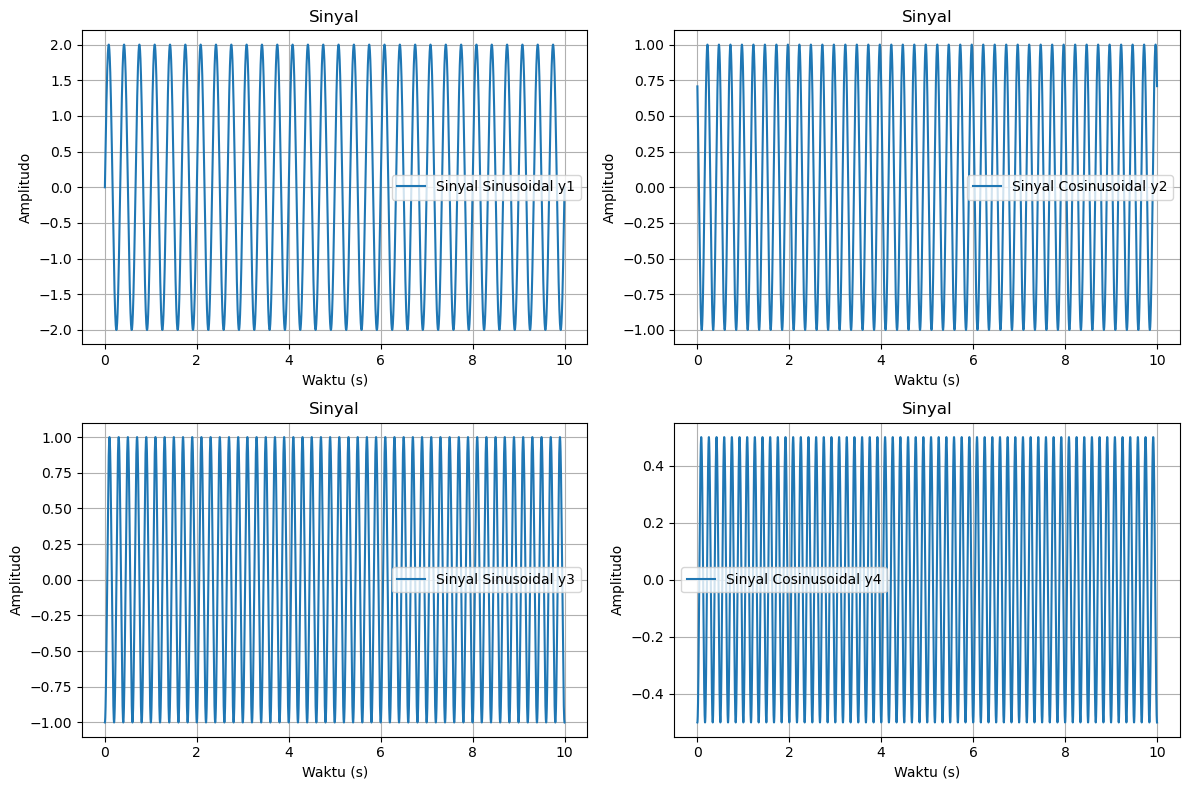

In [16]:
plt.figure(figsize=(12, 8)) # ukuran plot

# Plot y1
plt.subplot(2, 2, 1)
plt.plot(sumbu_waktu, y1, label='Sinyal Sinusoidal y1')
plt.title('Sinyal')
plt.xlabel('Waktu (s)')
plt.ylabel('Amplitudo')
plt.grid()
plt.legend()

# Plot y2
plt.subplot(2, 2, 2)
plt.plot(sumbu_waktu, y2, label='Sinyal Cosinusoidal y2')
plt.title('Sinyal')
plt.xlabel('Waktu (s)')
plt.ylabel('Amplitudo')
plt.grid()
plt.legend()

# Plot y3
plt.subplot(2, 2, 3)
plt.plot(sumbu_waktu, y3, label='Sinyal Sinusoidal y3')
plt.title('Sinyal')
plt.xlabel('Waktu (s)')
plt.ylabel('Amplitudo')
plt.grid()
plt.legend()

# Plot y4
plt.subplot(2, 2, 4)
plt.plot(sumbu_waktu, y4, label='Sinyal Cosinusoidal y4')
plt.title('Sinyal')
plt.xlabel('Waktu (s)')
plt.ylabel('Amplitudo')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

### Mari Kita Analisis (MaKiAn)


1. **Amplitudo dan Frekuensi Masing-Masing Sinyal**:
    - **Sinyal \( y1 \)**:
      - Amplitudo: 2
      - Frekuensi: 3 Hz
    - **Sinyal \( y2 \)**:
      - Amplitudo: 1
      - Frekuensi: 4 Hz
    - **Sinyal \( y3 \)**:
      - Amplitudo: 1
      - Frekuensi: 5 Hz
    - **Sinyal \( y4 \)**:
      - Amplitudo: 0.5
      - Frekuensi: 6 Hz

2. **Pengaruh Pergeseran Fase Terhadap Posisi Gelombang**:
    - Pergeseran fase menggeser posisi gelombang sepanjang sumbu waktu. Misalnya, pada sinyal \( y2 \), pergeseran fase sebesar \( \pi/4 \) menyebabkan gelombang bergeser ke kiri atau ke kanan tergantung pada tanda pergeseran fase tersebut. Pergeseran fase tidak mengubah amplitudo atau frekuensi gelombang, hanya posisi puncak dan lembah gelombang yang berubah.

3. **Pengaruh Amplitudo Terhadap Tampilan Gelombang**:
    - Amplitudo menentukan tinggi puncak dan rendah lembah dari gelombang. Sinyal dengan amplitudo yang lebih besar akan memiliki puncak yang lebih tinggi dan lembah yang lebih dalam. Misalnya, sinyal \( y1 \) dengan amplitudo 2 memiliki puncak yang lebih tinggi dibandingkan dengan sinyal \( y4 \) yang memiliki amplitudo 0.5.

4. **Pengaruh Pergeseran Fase Terhadap Tampilan Gelombang**:
    - Pergeseran fase mengubah posisi gelombang sepanjang sumbu waktu tanpa mengubah bentuk dasar gelombang. Misalnya, sinyal \( y3 \) dengan pergeseran fase \( \pi/2 \) akan memiliki puncak dan lembah yang bergeser dibandingkan dengan sinyal tanpa pergeseran fase. Pergeseran fase dapat menyebabkan dua gelombang dengan frekuensi dan amplitudo yang sama terlihat berbeda dalam hal posisi relatif puncak dan lembahnya.

---


### What's The Problem?
2. **Perbandingan Subplot**:
   - Buat gambar dengan 4 subplot (grid 2x2) untuk membandingkan semua sinyal secara berdampingan.
   - Setiap subplot harus berisi salah satu sinyal \( y1 \), \( y2 \), \( y3 \), dan \( y4 \).

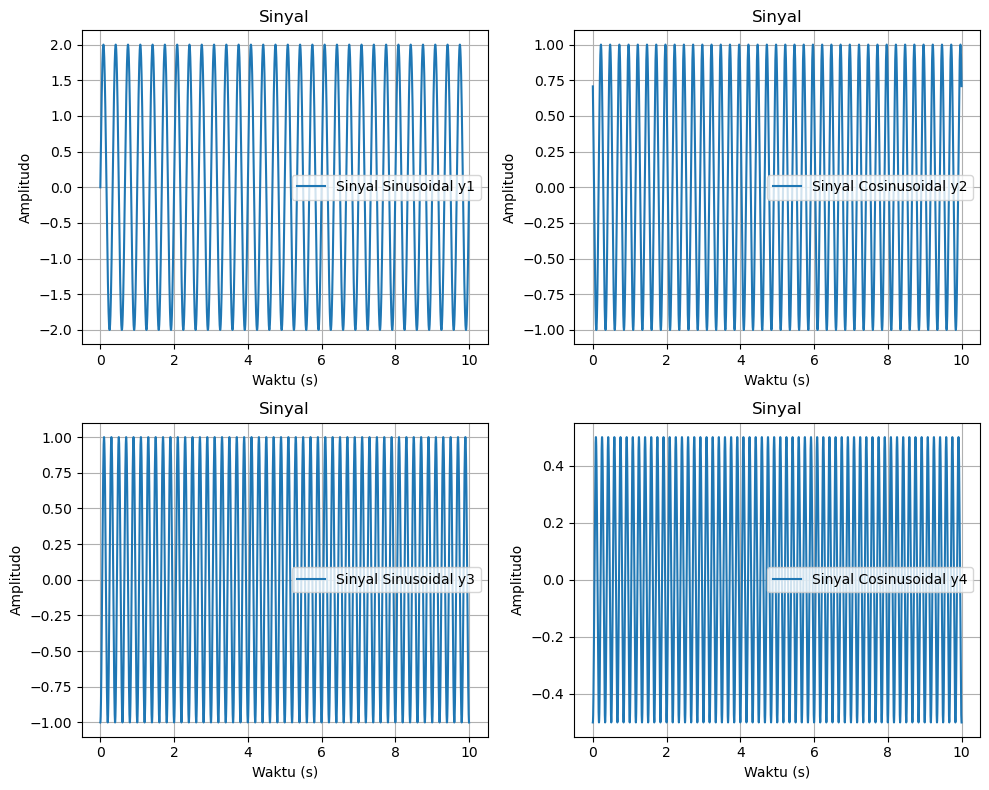

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

ax[0, 0].plot(sumbu_waktu, y1, label='Sinyal Sinusoidal y1')
ax[0, 0].set_title('Sinyal')
ax[0, 0].set_xlabel('Waktu (s)')
ax[0, 0].set_ylabel('Amplitudo')
ax[0, 0].grid()
ax[0, 0].legend()

ax[0, 1].plot(sumbu_waktu, y2, label='Sinyal Cosinusoidal y2')
ax[0, 1].set_title('Sinyal')
ax[0, 1].set_xlabel('Waktu (s)')
ax[0, 1].set_ylabel('Amplitudo')
ax[0, 1].grid()
ax[0, 1].legend()

ax[1, 0].plot(sumbu_waktu, y3, label='Sinyal Sinusoidal y3')
ax[1, 0].set_title('Sinyal')
ax[1, 0].set_xlabel('Waktu (s)')
ax[1, 0].set_ylabel('Amplitudo')
ax[1, 0].grid()
ax[1, 0].legend()

ax[1, 1].plot(sumbu_waktu, y4, label='Sinyal Cosinusoidal y4')
ax[1, 1].set_title('Sinyal')
ax[1, 1].set_xlabel('Waktu (s)')
ax[1, 1].set_ylabel('Amplitudo')
ax[1, 1].grid()
ax[1, 1].legend()

plt.tight_layout()
plt.show()
plt.close()

---

### What's The Problem
3. **Pertanyaan Analisis**:
   - Jawab pertanyaan berikut dalam sel markdown di Jupyter Notebook Anda:
     1. Berapa amplitudo dan frekuensi masing-masing sinyal?
     2. Bagaimana pergeseran fase mempengaruhi posisi gelombang? (Anda dapat mengubah nilai fase pada sinyal-sinyal yang telah dibuat sesuka anda)
     3. Bandingkan sinyal-sinyal dengan amplitudo yang berbeda dan diskusikan bagaimana amplitudo mempengaruhi tampilan gelombang.
     4. Bandingkan sinyal-sinyal dengan pergeseran fase yang berbeda dan diskusikan bagaimana pergeseran fase mempengaruhi tampilan gelombang.

#### Jawaban
|Soal|Jawaban|
|---|---|
|Berapa amplitudo dan frekuensi masing-masing sinyal?| Amplitudo dari $y1$ adalah 2, frekuensi adalah 3 Hz. ; Amplitudo dari $y2$ adalah 1, frekuensi adalah 4 Hz. ; Amplitudo dari $y3$ adalah 1, frekuensi adalah 5 Hz. ; Amplitudo dari $y4$|adalah 0.5, frekuensi adalah 6 Hz|
| Bagaimana pergeseran fase mempengaruhi posisi gelombang? (Anda dapat mengubah nilai fase pada sinyal-sinyal yang telah dibuat sesuka anda) |Pergeseran fase menggeser posisi gelombang secara horizontal. Misalnya, pada $y2$, fase $\pi/4$ menggeser gelombang ke kanan, sementara pada $y3$, fase $\pi/2$ menggeser gelombang lebih jauh ke kanan.|
|Bandingkan sinyal-sinyal dengan amplitudo yang berbeda dan diskusikan bagaimana amplitudo mempengaruhi tampilan gelombang | Sinyal dengan amplitudo lebih besar memiliki puncak dan lembah yang lebih tinggi. Sebagai contoh, $y1$ dengan amplitudo 2 terlihat lebih tinggi dibandingkan $y4$ yang hanya memiliki amplitudo 0.5. |
| Bandingkan sinyal-sinyal dengan pergeseran fase yang berbeda dan diskusikan bagaimana pergeseran fase mempengaruhi tampilan gelombang. | Pergeseran fase menggeser titik awal gelombang pada sumbu waktu. Semakin besar pergeseran fase, semakin banyak pergeseran gelombang secara horizontal (misalnya, $y3$ dengan fase $\pi/2$ dibandingkan dengan $y1$ yang tidak memiliki pergeseran fase). |

---

### What's The Problem?
4. **Tugas Lanjutan**:
   - Buat sinyal baru $y5$ yang merupakan kombinasi dari $y1$ dan $y2$ yaitu, $y5 = y1 + y2$.
   - Plot $y5$ dan diskusikan bagaimana kombinasi dua gelombang sinus/cosinus mempengaruhi bentuk gelombang yang dihasilkan.

### Tahap Eksekusi
1. Deklarasikan sinyal baru yang dalam hal ini $y5$ dengan kombinasi yang sudah ditentukan dalam `What's The Problem`

In [23]:
y5 = y1 + y2 #hasil penjumlahan sinyal y1 dan y2

2. Visualisasikan gambar sinyal baru yang telah ditambahkan dalam kombinasi ini

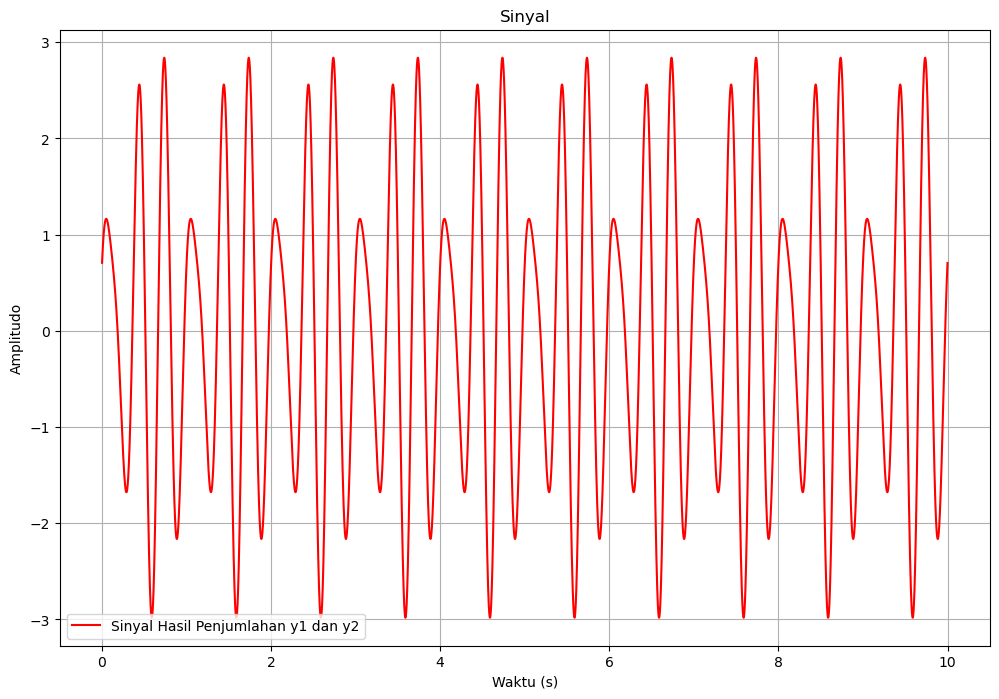

In [24]:
plt.figure(figsize=(12, 8))
plt.plot(sumbu_waktu, y5, label='Sinyal Hasil Penjumlahan y1 dan y2', color='red')
plt.title('Sinyal')
plt.xlabel('Waktu (s)')
plt.ylabel('Amplitudo')
plt.grid()
plt.legend()
plt.show()
plt.close()

### Mari Kita Analisis (MaKiAn)
Sinyal $y5$ adalah hasil penjumlahan dari dua gelombang sinusoidal dengan frekuensi dan amplitudo yang berbeda. Kombinasi ini menghasilkan interferensi yang menciptakan pola gelombang baru dengan bentuk yang lebih kompleks, tergantung pada fase dan amplitudo masing-masing sinyal.